## 1.BUSINESS UNDERSTANDING


    A.INTRODUCTION

The business problem at hand is the need to provide homeowners with accurate and reliable advice regarding home renovations and their potential impact on the estimated value of their homes. The stakeholder aims to assist homeowners in making informed decisions about renovating their properties, enabling them to maximize their investment returns while improving their living spaces.

To address this problem effectively, the stakeholder must gather relevant data and insights, analyze the factors that influence home value, and develop a comprehensive advisory framework. This framework should consider various renovation projects, their costs, and their potential impact on the estimated value of homes.

The stakeholder needs to establish a thorough understanding of the real estate market, regional trends, and buyer preferences to provide accurate advice. Factors such as location, property size, number of bedrooms and bathrooms, overall condition, and specific features play crucial roles in determining the value of a home. By assessing these factors and their relationship with renovation projects, the stakeholder can guide homeowners toward the most effective improvements.

To achieve this, the stakeholder may need to collaborate with real estate agents, property appraisers, and industry experts who can provide valuable insights into market dynamics and trends. Additionally, data analysis and machine learning techniques can be employed to identify correlations between renovation projects and home value, enabling the stakeholder to offer data-driven recommendations.

The stakeholder should also consider the financial aspect, helping homeowners understand the costs associated with different renovations and estimating the potential increase in the value of their homes. By providing homeowners with a clear understanding of the return on investment (ROI) for various renovation projects, the stakeholder can assist in making informed decisions that align with homeowners' budgetary constraints and goals.


    B.PROBLEM STATEMENT
The stakeholder has a critical business issue to solve: how to give homeowners reliable, individualized recommendations about house improvements and how such changes can affect the assessed worth of their properties. Currently, homeowners are unable to rely on trustworthy information about the extent to which and how much a certain restoration project will raise their property value. Due to this knowledge gap, homeowners are unable to make informed judgments regarding their renovation spending, which creates uncertainty and may result in missed opportunities. The idea is to create a solution that makes use of data-driven insights and industry knowledge to provide thorough guidance to homeowners, aiding them to understand the potential value increase associated with various remodeling options and make decisions that are in line with their objectives and financial considerations.

    C.MAIN OBJECTIVE
To give homeowners specific and reliable information on how and by how much home improvements can raise the projected value of their houses. This goal strives to arm homeowners with the knowledge they need to choose renovation projects that maximize return on investment while raising the value of their homes.


    D.SPECIFIC OBJECTIVES
-To assess the influence of various home renovation projects on the projected value of properties.i.e.:renovation impact. This entails examining historical data, market trends, and sector insights to pinpoint the improvements with the most potential to raise the value of real estate. Homeowners can concentrate on the most efficient projects by analyzing the effects of various renovation types, such as kitchen remodels, bathroom upgrades, or energy-efficient enhancements.

-The second goal is to provide homeowners with tailored advice based on their unique property details, location, and remodeling aspirations. The goal is to offer individualized advise that emphasizes the remodeling projects most likely to result in a rise in estimated property worth by taking into account elements including the property's size, condition, and market demand. Homeowners can properly prioritize their remodeling projects and allocate resources thanks to customized recommendations.

-To identify how much the projected value of homes may rise under various remodeling scenarios. The goal is to give homeowners accurate estimates of the anticipated value gain for certain renovation projects by utilizing data analysis, statistical modeling, and historical data.

## 2.IMPORTING LIBRARIES

In [96]:
#loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



## 3.LOADING THE DATA

In [97]:
#reading the data
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [98]:
#understand the data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [99]:
#understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# 4.DATA CLEANING

## MISSING VALUES

In [100]:
#checking for missing values
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# CHECKING FOR DUPLICATES

In [101]:
#checking for duplicates
data.duplicated().any()

False

## HANDLING MISSING VALUES

We will use mode imputation to fill missing values so as to maintain the overall balance of categories.

In [102]:
#replace specific values in the column with corresponding replacements
data['waterfront'] = data['waterfront'].replace({0.0: 'No', 1.0: 'Yes'})
#computes the count of unique values
value_counts = data['waterfront'].value_counts()
print(value_counts)


NO     19075
YES      146
Name: waterfront, dtype: int64


In [103]:
#mode imputation
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [104]:
data['view'] = data['view'].replace({0: 'No',1.0: 'Yes'})
value_counts = data['view'].value_counts()
print(value_counts)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [105]:
data['view'] = data['view'].fillna(data['view'].mode().iloc[0])
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [106]:
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_renovated'].mode().iloc[0])
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [107]:
data['yr_renovated'].fillna(0, inplace=True)

In [108]:
#check for null values
pd.DataFrame(data.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [110]:
#convert 'yr_renovated' column to integers
data['yr_renovated'] = data['yr_renovated'].replace({'No': 0}).astype(int)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


## LABEL ENCODING

Transform categorical variables into numerical labels as this a requirement for most machine learning algorithms

In [111]:

#define the columns with categorical variables
categorical_columns = ['floors','waterfront','view','grade','condition']
#create a LabelEncoder object
label_encoder = LabelEncoder()

#apply label encoding to the categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))



#print the updated dataset
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,0,4,...,8,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,4,...,8,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0,4,...,7,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0,4,...,8,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0,4,...,9,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,4,0,4,...,9,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,4,...,9,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,4,...,8,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,4,...,9,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [112]:
#extract the year from the 'date' column 
#data['year'] = data['date'].dt.year
#calculate years since renovation
data['renovation_age'] = data['yr_built'] - data['yr_renovated']
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0,0,4,...,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,4,...,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,-40
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0,0,4,...,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0,0,4,...,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0,0,4,...,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,4,0,4,...,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,4,...,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,4,...,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,4,...,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2004


## EXPLORATORY DATA ANALYSIS

In [113]:
#convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
#calculate the time difference between the 'date' and 'yr_built'
data['years_since_sold'] = data['date'].dt.year - data['yr_built']
#check the updated dataset
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation_age,years_since_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,4,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,1955,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,0,4,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,-40,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,4,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,1933,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,1965,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,4,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,4,0,4,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,2009,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2,0,4,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2014,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2,0,4,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2009,5
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2,0,4,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2004,11


In [114]:
data = data.drop(['id','date','long','sqft_living15','sqft_lot15','yr_built','yr_renovated'], axis=1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,221900.0,3,1.00,1180,5650,0,0,4,0,8,1180,0.0,98178,47.5112,1955,59
1,538000.0,3,2.25,2570,7242,2,0,4,0,8,2170,400.0,98125,47.7210,-40,63
2,180000.0,2,1.00,770,10000,0,0,4,0,7,770,0.0,98028,47.7379,1933,82
3,604000.0,4,3.00,1960,5000,0,0,4,4,8,1050,910.0,98136,47.5208,1965,49
4,510000.0,3,2.00,1680,8080,0,0,4,0,9,1680,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,4,0,4,0,9,1530,0.0,98103,47.6993,2009,5
21593,400000.0,4,2.50,2310,5813,2,0,4,0,9,2310,0.0,98146,47.5107,2014,1
21594,402101.0,2,0.75,1020,1350,2,0,4,0,8,1020,0.0,98144,47.5944,2009,5
21595,400000.0,3,2.50,1600,2388,2,0,4,0,9,1600,0.0,98027,47.5345,2004,11


## CORRELATION AND DATA VISUALIZATIONS

Before creating our simple linear regression it is important to provide valuable insights into the relationship betweenn variables and help identify potential predictors for the regression model.We do this through correlation

In [115]:
#check correlation
correlation_matrix = data.corr()
correlation_matrix

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8656\3074910175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,renovation_age,years_since_sold
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,-0.304727,0.022246,-0.366458,0.605368,-0.053402,0.306692,-0.111340,-0.053890
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,-0.067322,0.010281,-0.061553,0.479386,-0.154092,-0.009951,-0.005237,-0.155817
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.147591,-0.154490,-0.170167,0.686668,-0.204786,0.024280,-0.006133,-0.507561
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.228444,-0.081177,-0.316768,0.876448,-0.199802,0.052155,-0.024904,-0.318592
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.051036,0.000125,-0.090127,0.184139,-0.129586,-0.085514,-0.000693,-0.052853
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.013924,-0.287480,-0.047015,0.523989,-0.059541,0.049239,0.035002,-0.489514
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,-0.228500,0.019410,-0.081736,0.071778,0.028923,-0.012157,-0.074469,0.024406
view,-0.304727,-0.067322,-0.147591,-0.228444,-0.051036,-0.013924,-0.228500,1.000000,-0.041205,0.100525,-0.130867,-0.080808,-0.012381,0.066056,-0.061064
condition,0.022246,0.010281,-0.154490,-0.081177,0.000125,-0.287480,0.019410,-0.041205,1.000000,0.024222,-0.180801,0.010265,-0.019233,0.026616,0.394954
grade,-0.366458,-0.061553,-0.170167,-0.316768,-0.090127,-0.047015,-0.081736,0.100525,0.024222,1.000000,-0.318437,0.032383,-0.029839,-0.005177,0.008881


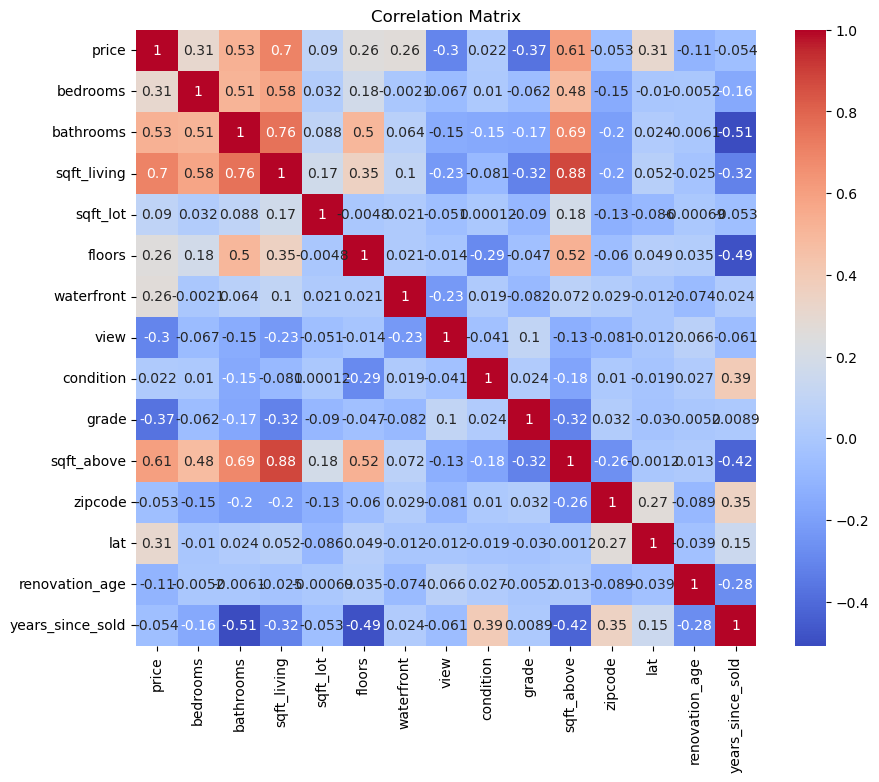

In [116]:

#plot the correlation using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


INTERPRETATION

The price of the house is positively correlated with the number of bedrooms, bathrooms, square footage of living area and square footage above ground level. This indicates that as these variables increase, the price of the house tends to increase as well.

The price of the house is negatively correlated with the grade of the house.A higher grade is associated with a lower price.

The number of bedrooms and bathrooms are positively correlates, suggesting that houses with more bedroomrs tend to have more bathrooms as well.

The square footage of the living area is strongly correlated with the square footage above the ground level.This is expected since the total livng area includes the area above the ground level.

The years since the house was sold is negatively correlated with the number of bathrooms, indicating that houses sold more recently tend to have fewer bathrooms.

The price of the house is negatively correlated with the latitude and age of renovation.This suggests that houses with higher latitude and more recent renovation tend to have lower prices.



## DATA NORMALIZATION

A preprocessing technique commonly used in machine learning to bring the features or variables of a dataset onto a common scale.


In [117]:

#create a new dataframe with the columns to be scaled
columns_to_scale = ['sqft_living','sqft_lot','floors','sqft_above']
data_to_scale = data[columns_to_scale]
#initialize the MinMaxScaler object
scaler = MinMaxScaler()
#fit and transfrom the data using the scaler
scaled_data = scaler.fit_transform(data_to_scale)
#create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
#merge the scaled data with the remaining columns from the original data
data_scaled = pd.concat([scaled_df,data.drop(columns=columns_to_scale)], axis=1) 
#display the sacled data
data_scaled



,sqft_living,sqft_lot,floors,sqft_above,price,bedrooms,bathrooms,waterfront,view,condition,grade,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,0.061503,0.003108,0.0,0.089602,221900.0,3,1.00,0,4,0,8,0.0,98178,47.5112,1955,59
1,0.167046,0.004072,0.4,0.199115,538000.0,3,2.25,0,4,0,8,400.0,98125,47.7210,-40,63
2,0.030372,0.005743,0.0,0.044248,180000.0,2,1.00,0,4,0,7,0.0,98028,47.7379,1933,82
3,0.120729,0.002714,0.0,0.075221,604000.0,4,3.00,0,4,4,8,910.0,98136,47.5208,1965,49
4,0.099468,0.004579,0.0,0.144912,510000.0,3,2.00,0,4,0,9,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.000370,0.8,0.128319,360000.0,3,2.50,0,4,0,9,0.0,98103,47.6993,2009,5
21593,0.147304,0.003206,0.4,0.214602,400000.0,4,2.50,0,4,0,9,0.0,98146,47.5107,2014,1
21594,0.049355,0.000503,0.4,0.071903,402101.0,2,0.75,0,4,0,8,0.0,98144,47.5944,2009,5
21595,0.093394,0.001132,0.4,0.136062,400000.0,3,2.50,0,4,0,9,0.0,98027,47.5345,2004,11


## CHECK THE DISTRIBUTION OF INDEPENDENT VARIABLES

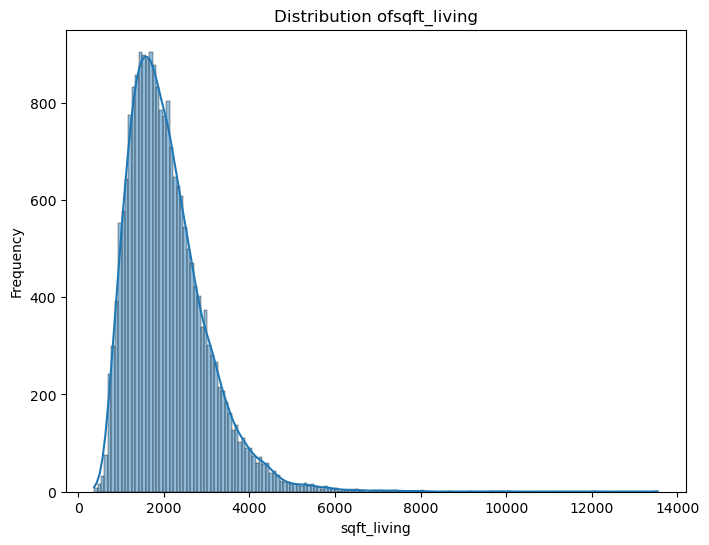

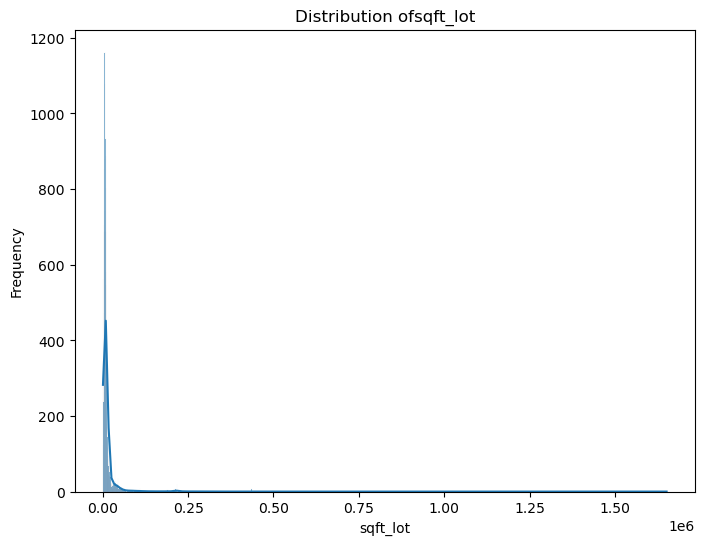

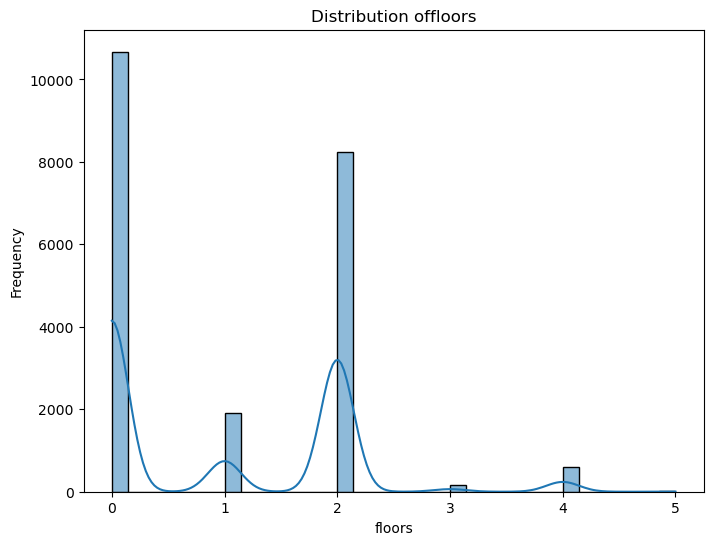

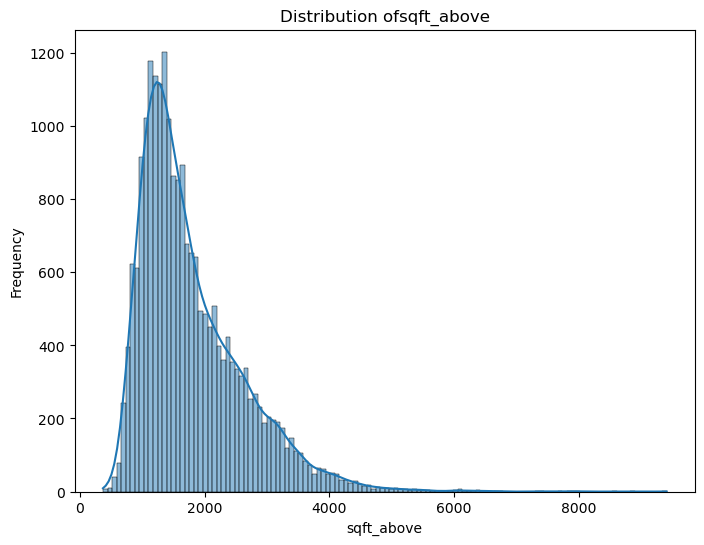

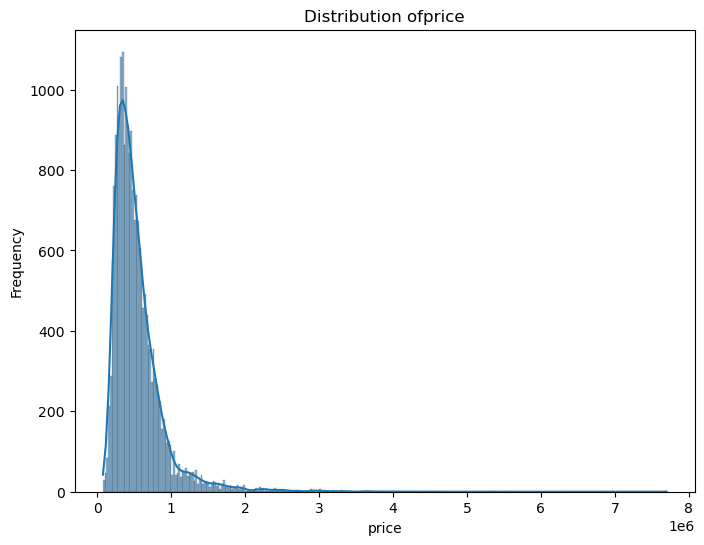

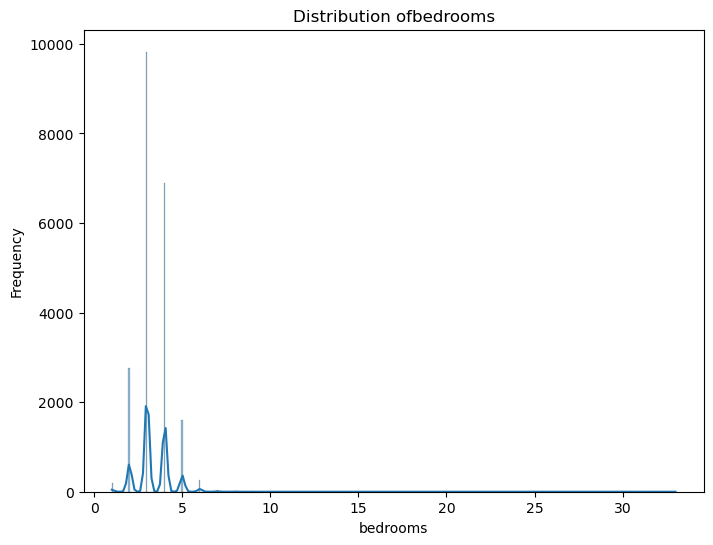

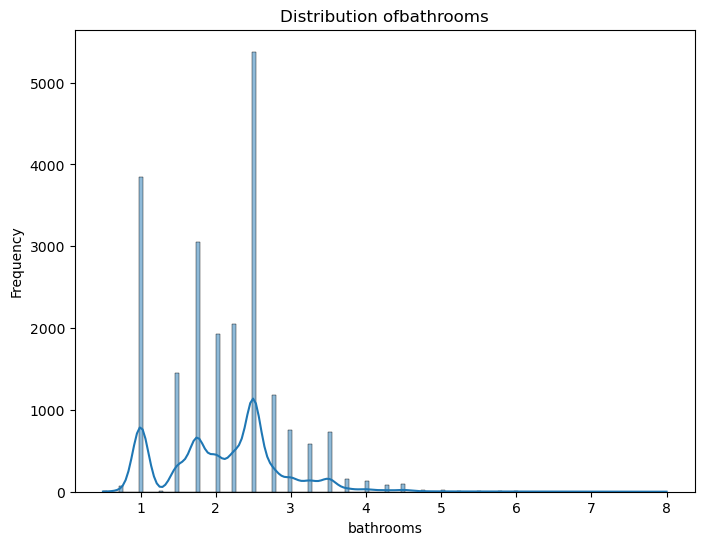

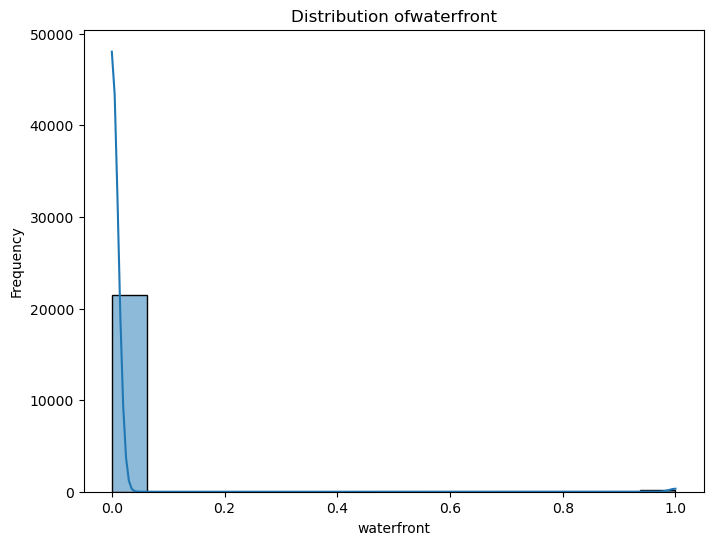

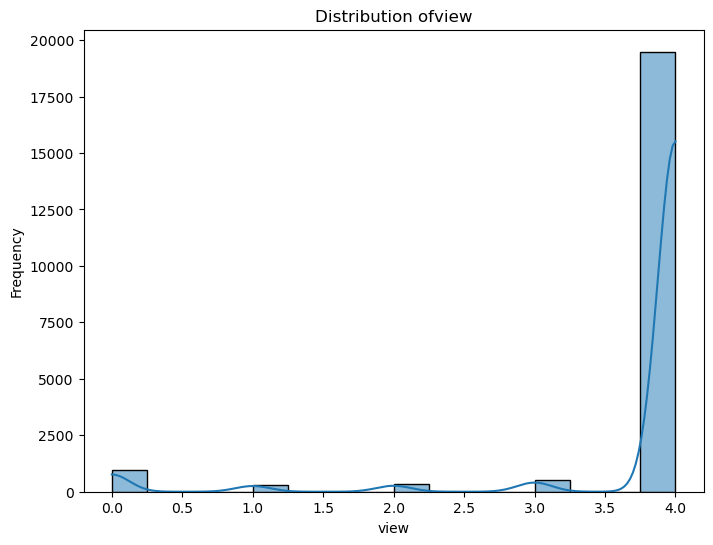

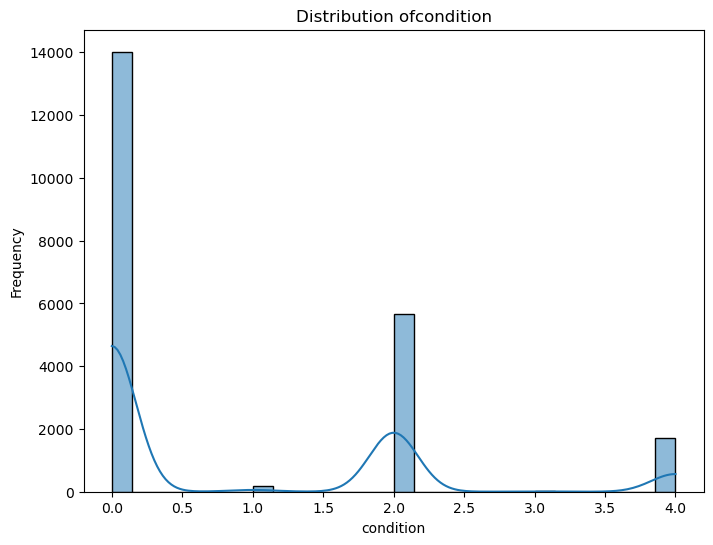

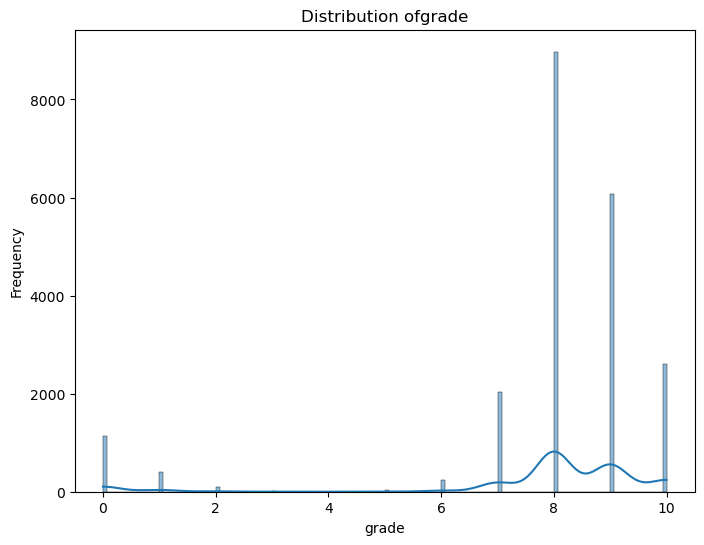

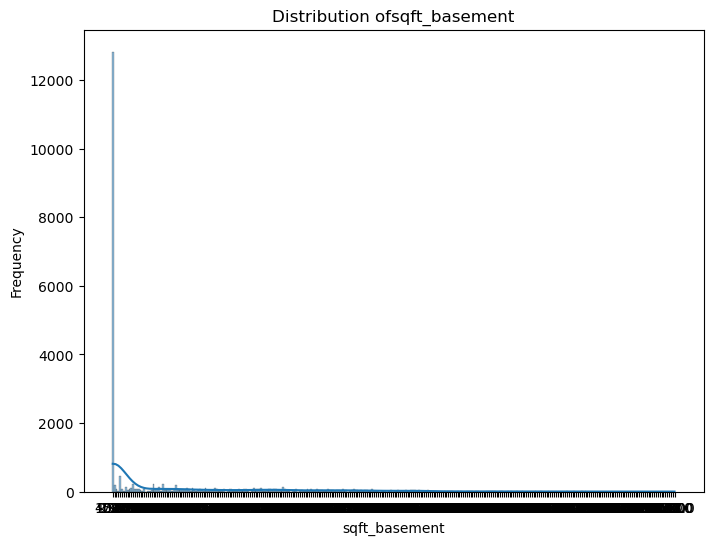

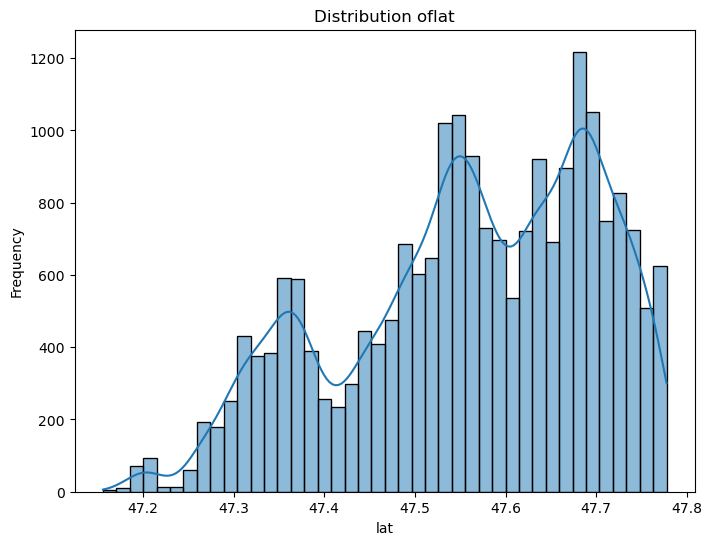

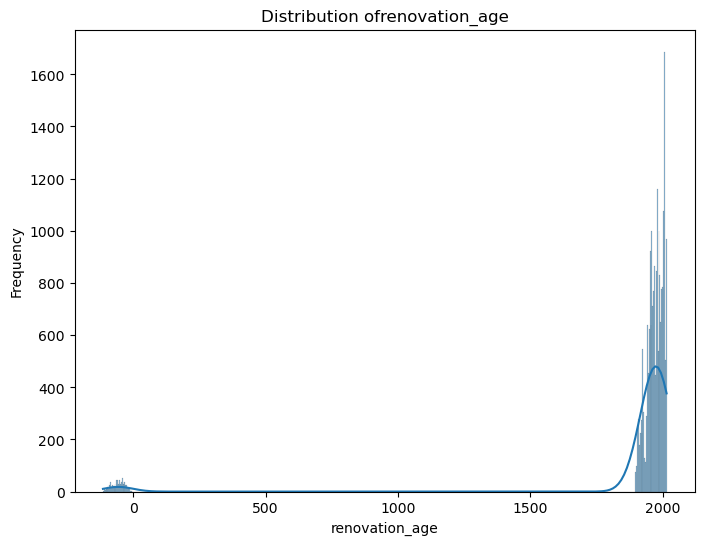

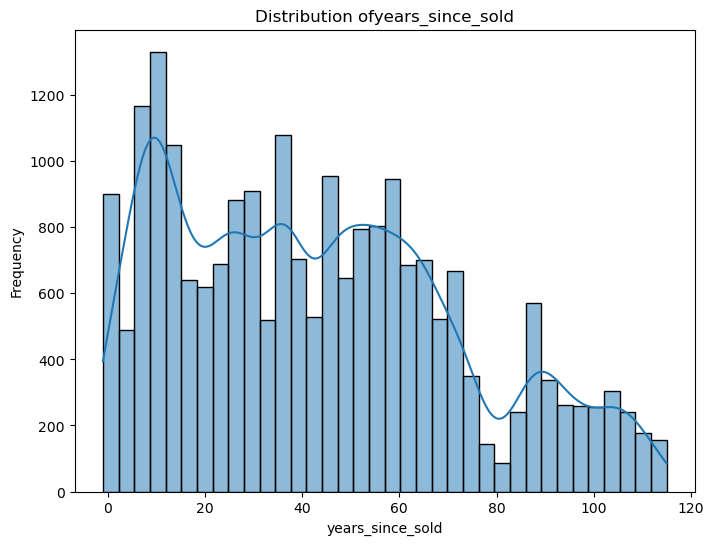

In [118]:
#select the independent variables
independent_vars = ['sqft_living', 'sqft_lot','floors','sqft_above','price','bedrooms','bathrooms','waterfront','view','condition','grade','sqft_basement','lat','renovation_age','years_since_sold']
#plot the distribution of independent variables
for var in independent_vars:
    plt.figure(figsize=(8,6))
    sns.histplot(data[var],kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Distribution of' + var)
    plt.show()

INTERPRETATION

Looking at the histograms of the independent variables, we can make the following observations:

1. sqft_living: The distribution of square footage of living space appears to be skewed to the right, indicating that a majority of the houses have lower square footage. There is a peak around 0.1.

2. sqft_lot: The distribution of square footage of the lot also appears to be right-skewed, indicating that most houses have smaller lot sizes. The majority of the data is concentrated around the lower values.

3. floors: The number of floors seems to be mostly concentrated at values 0, 0.5, 1.0, and 2.0, with very few instances of other values. This suggests that the majority of houses have either one or two floors.

4. sqft_above: The distribution of square footage above the ground level shows a similar pattern to sqft_living, indicating a positive correlation between the two variables.

5. price: The distribution of house prices is heavily right-skewed, with a long tail to the right. This suggests that most houses have lower prices, while a few have significantly higher prices.

6. bedrooms: The distribution of the number of bedrooms appears to be relatively normally distributed, with a peak around 3 or 4 bedrooms.

7. bathrooms: The distribution of the number of bathrooms also appears to be normally distributed, with peaks around 2 or 3 bathrooms.

8. waterfront: This variable is binary, with values of 0 or 1 indicating whether a house has a waterfront view. The distribution shows that the majority of houses do not have a waterfront view.

9. view: This variable represents the level of view a house has and is also a discrete variable. The distribution shows that the majority of houses have a view level of 0.

10. condition: The distribution of the condition of the houses appears to be relatively evenly distributed, with no significant peaks or patterns.

11. grade: The distribution of the grade assigned to the houses shows a slight positive skew, with most houses having grades between 7 and 8.

12. sqft_basement: The distribution of square footage of the basement shows a large number of houses with no basement (value 0) and a smaller number with varying basement sizes.

13. lat: The latitude values show a relatively normal distribution with a peak around 47.5.

14. renovation_age: The distribution of the age of renovation appears to be right-skewed, indicating that most houses have not undergone recent renovations.

15. years_since_sold: The distribution of years since the houses were sold shows a relatively even distribution, with no significant peaks or patterns.

These visualizations provide insights into the distributions of the independent variables in the dataset and can help in understanding their characteristics and potential relationships with the target variable.


# Log Transformations on Target Variable
To perform a log transformation on the target variable, you can apply the natural logarithm (log base e) to the 'price' column. This transformation can help to normalize the distribution of the target variable, especially if it is heavily skewed.

In [119]:
#perform log transformation on the target variable
data['price'] = np.log(data['price'])
#verify the transformed values
print(data['price'])

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 21597, dtype: float64


In [120]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,12.309982,3,1.00,1180,5650,0,0,4,0,8,1180,0.0,98178,47.5112,1955,59
1,13.195614,3,2.25,2570,7242,2,0,4,0,8,2170,400.0,98125,47.7210,-40,63
2,12.100712,2,1.00,770,10000,0,0,4,0,7,770,0.0,98028,47.7379,1933,82
3,13.311329,4,3.00,1960,5000,0,0,4,4,8,1050,910.0,98136,47.5208,1965,49
4,13.142166,3,2.00,1680,8080,0,0,4,0,9,1680,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,3,2.50,1530,1131,4,0,4,0,9,1530,0.0,98103,47.6993,2009,5
21593,12.899220,4,2.50,2310,5813,2,0,4,0,9,2310,0.0,98146,47.5107,2014,1
21594,12.904459,2,0.75,1020,1350,2,0,4,0,8,1020,0.0,98144,47.5944,2009,5
21595,12.899220,3,2.50,1600,2388,2,0,4,0,9,1600,0.0,98027,47.5345,2004,11


# More data cleaning to ensure the data is ready for modeling

In [121]:
median_value = data['sqft_basement'][data['sqft_basement'] != '?'].median()
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', median_value))


In [122]:
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'])


In [123]:
#convert the independent variables to numeric datatypes
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')
data['bathrooms'] = pd.to_numeric(data['bathrooms'], errors='coerce')

In [124]:
data.dtypes

price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors                int32
waterfront            int32
view                  int32
condition             int32
grade                 int32
sqft_above            int64
sqft_basement       float64
zipcode               int64
lat                 float64
renovation_age        int64
years_since_sold      int64
dtype: object

In [125]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,12.309982,3,1.00,1180,5650,0,0,4,0,8,1180,0.0,98178,47.5112,1955,59
1,13.195614,3,2.25,2570,7242,2,0,4,0,8,2170,400.0,98125,47.7210,-40,63
2,12.100712,2,1.00,770,10000,0,0,4,0,7,770,0.0,98028,47.7379,1933,82
3,13.311329,4,3.00,1960,5000,0,0,4,4,8,1050,910.0,98136,47.5208,1965,49
4,13.142166,3,2.00,1680,8080,0,0,4,0,9,1680,0.0,98074,47.6168,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,3,2.50,1530,1131,4,0,4,0,9,1530,0.0,98103,47.6993,2009,5
21593,12.899220,4,2.50,2310,5813,2,0,4,0,9,2310,0.0,98146,47.5107,2014,1
21594,12.904459,2,0.75,1020,1350,2,0,4,0,8,1020,0.0,98144,47.5944,2009,5
21595,12.899220,3,2.50,1600,2388,2,0,4,0,9,1600,0.0,98027,47.5345,2004,11


In [126]:
# Identify outliers using z-score
z_scores = np.abs((data - data.mean()) / data.std())
outlier_threshold = 3  # Adjust the threshold as needed
outliers = data[z_scores > outlier_threshold]
# Remove outliers from the dataset
data_cleaned = data[z_scores <= outlier_threshold]
data_cleaned


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,renovation_age,years_since_sold
0,12.309982,3.0,1.00,1180.0,5650.0,0.0,0.0,4.0,0,8.0,1180.0,0.0,98178,47.5112,1955.0,59
1,13.195614,3.0,2.25,2570.0,7242.0,2.0,0.0,4.0,0,8.0,2170.0,400.0,98125,47.7210,NaN,63
2,12.100712,2.0,1.00,770.0,10000.0,0.0,0.0,4.0,0,7.0,770.0,0.0,98028,47.7379,1933.0,82
3,13.311329,4.0,3.00,1960.0,5000.0,0.0,0.0,4.0,4,8.0,1050.0,910.0,98136,47.5208,1965.0,49
4,13.142166,3.0,2.00,1680.0,8080.0,0.0,0.0,4.0,0,9.0,1680.0,0.0,98074,47.6168,1987.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,3.0,2.50,1530.0,1131.0,4.0,0.0,4.0,0,9.0,1530.0,0.0,98103,47.6993,2009.0,5
21593,12.899220,4.0,2.50,2310.0,5813.0,2.0,0.0,4.0,0,9.0,2310.0,0.0,98146,47.5107,2014.0,1
21594,12.904459,2.0,0.75,1020.0,1350.0,2.0,0.0,4.0,0,8.0,1020.0,0.0,98144,47.5944,2009.0,5
21595,12.899220,3.0,2.50,1600.0,2388.0,2.0,0.0,4.0,0,9.0,1600.0,0.0,98027,47.5345,2004.0,11


In [127]:
data_cleaned = data.dropna()
#verify if the missing values have been removed
data_cleaned.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
lat                 0
renovation_age      0
years_since_sold    0
dtype: int64

In [128]:
data_cleaned.corr()['price']

price               1.000000
bedrooms            0.343360
bathrooms           0.551249
sqft_living         0.695185
sqft_lot            0.100025
floors              0.310630
waterfront          0.170720
view               -0.283655
condition           0.014409
grade              -0.248019
sqft_above          0.601579
sqft_basement       0.313119
zipcode            -0.038788
lat                 0.448837
renovation_age     -0.098453
years_since_sold   -0.080499
Name: price, dtype: float64

# Linear Regression

In [137]:
#split the data into X and y
X = data_cleaned[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','lat','sqft_basement','zipcode','renovation_age','years_since_sold']]
y = data_cleaned['price']
#add a constabt term to X
X = sm.add_constant(X)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and fit the OLS model using the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

#Evaluate the model on the testing data
y_pred = results.predict(X_test)

#Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2799.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:16:57   Log-Likelihood:                -2817.9
No. Observations:               17277   AIC:                             5668.
Df Residuals:                   17261   BIC:                             5792.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5360      4.475  

# INTERPRETATION

The given regression model is statistically significant. This is indicated by the following information from the OLS regression results:

- The F-statistic value is 2799, and the associated p-value is 0.00 (Prob (F-statistic)). The F-statistic tests the overall significance of the model by comparing the variability explained by the model to the variability not explained. In this case, the very low p-value suggests that the model as a whole is statistically significant.

- Additionally, the individual coefficients of the predictor variables have corresponding t-values and p-values. These values indicate the statistical significance of each predictor variable's contribution to the model. In the given results, all the predictor variables have p-values of 0.000 (except for 'grade' with a p-value of 0.104), indicating that they are statistically significant in explaining the house price.

-Therefore, based on the F-statistic and the p-values of the coefficients, we can conclude that this regression model is statistically significant in predicting the house price.

   - Bedrooms: The coefficient of -0.0399 suggests that an increase in the number of bedrooms is associated with a decrease in the house price.
   - Bathrooms: The coefficient of 0.0909 indicates that an increase in the number of bathrooms is associated with an increase in the house price.
   - Sqft_living: The coefficient of 0.0003 implies that a one-unit increase in the square footage of living space is associated with a corresponding increase in the house price.
   - Sqft_lot: The coefficient of 2.104e-07 suggests that a one-unit increase in the size of the lot is associated with a corresponding increase in the house price.
   - Floors: The coefficient of 0.0410 implies that having multiple floors is associated with a higher house price.
   - Waterfront: The coefficient of 0.4944 indicates that having a waterfront view is associated with a significant increase in the house price.
   - View: The coefficient of -0.0594 suggests that a better view is associated with a lower house price.
   - Condition: The coefficient of 0.0322 implies that houses in better condition tend to have higher prices.
   - Grade: The coefficient of -0.0017 indicates that the grade of the house may not have a significant impact on the price.
   - Sqft_above: The coefficient of 8.025e-05 suggests that an increase in the above-ground square footage is associated with an increase in the house price.

It's important to note that these interpretations are based solely on the coefficients and their statistical significance.

In [134]:

#calculate R2 score
r2 = r2_score(y_test, y_pred)
#calculate MSE
mse = mean_squared_error(y_test,y_pred)
#calculate RMSE
rmse = np.sqrt(mse)

print("R2 score:", r2)
print("Mean Squared Error:", mse)
print('Root Mean Squared Error:', rmse)

R2 score: 0.696030455006574
Mean Squared Error: 0.08278675877944211
Root Mean Squared Error: 0.2877268822676152


# VISUALIZE THE MODEL

In [135]:
#plotting residuals
print(results.resid)

6243    -0.119536
8986    -0.078299
9419     0.193080
10155   -0.155263
10436   -0.090029
           ...   
11964   -0.046583
21575    0.195581
5390    -0.303914
860      0.203717
15795   -0.329055
Length: 17277, dtype: float64


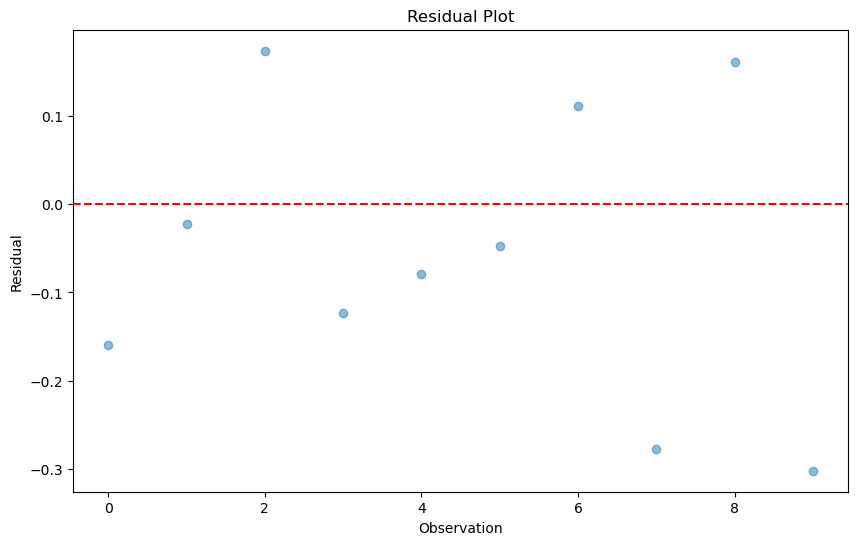

In [136]:

# store the residuals in a pandas Series called 'residuals'
residuals = [-0.159221, -0.022154, 0.174427, -0.123263, -0.079181,-0.047800, 0.111453, -0.277946, 0.161658, -0.302324]
# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Based on the scatter plot of the residuals, we can make the following observations:

1. Randomness: The scatter plot shows a random distribution of residuals around the zero-residual line. There are no clear patterns or trends observed, indicating that the model captures the relationship between the predictors and the outcome reasonably well.

2. Homoscedasticity: The spread of residuals appears relatively consistent across the range of observations. There is no noticeable funnel-shaped or cone-shaped pattern, suggesting that the assumption of constant variance (homoscedasticity) is not violated.

3. Zero-residual line: The red dashed line at y=0 represents the zero-residual line. The fact that the majority of the residuals are distributed around this line indicates that, on average, the model's predictions are close to the actual observed values.

4. Outliers: It seems that there are a few data points that deviate noticeably from the zero-residual line. These outliers might represent observations with larger prediction errors or instances where the model fails to capture the underlying patterns effectively. It could be worth investigating these specific observations further to understand their potential impact on the model's performance.

Overall, the scatter plot of residuals suggests that the regression model has captured the relationship between the independent variables and the dependent variable reasonably well. 


## CONCLUSION